In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


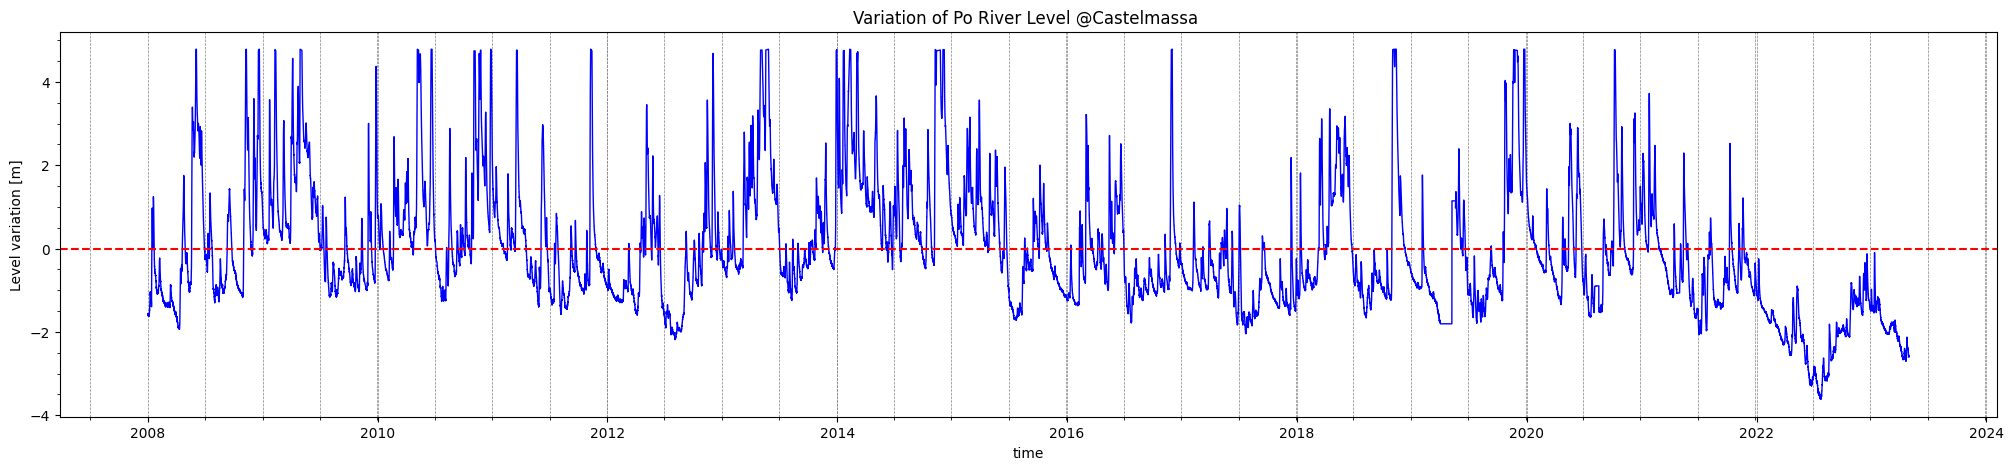

In [2]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [3]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

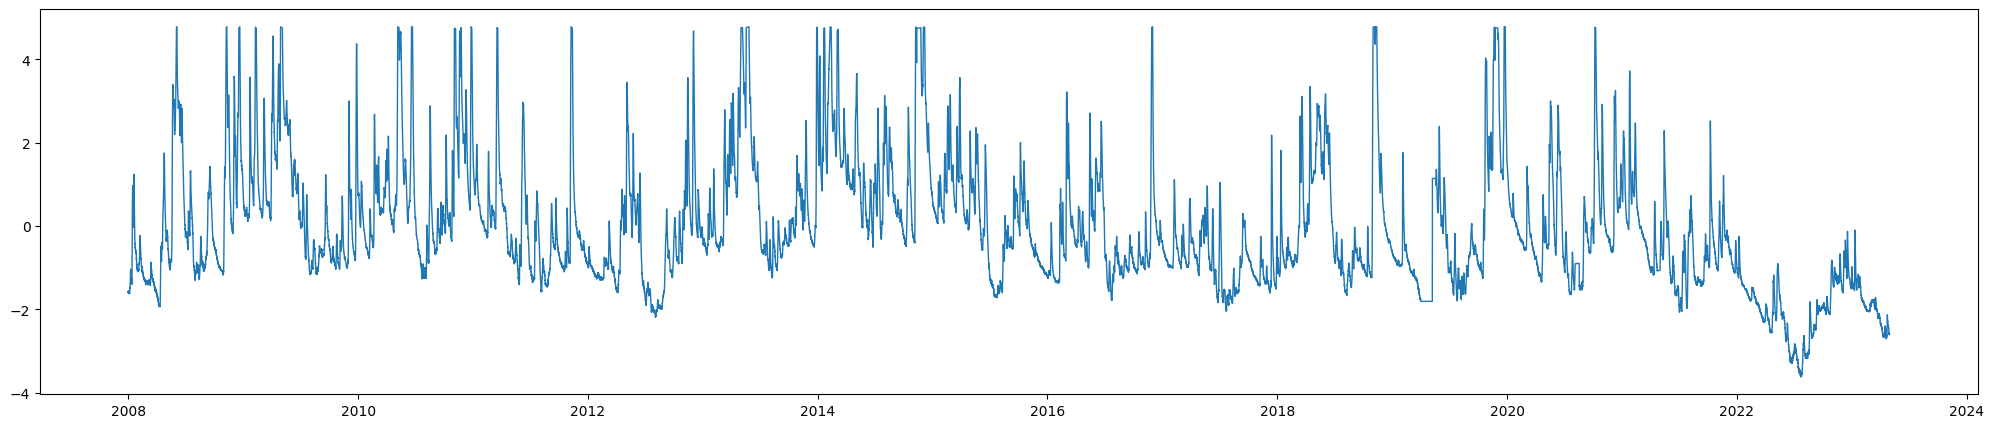

In [4]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [5]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Delta'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [6]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1 -0.677610 2008-01-01
1    2008     2 -1.054299 2008-02-01
2    2008     3 -1.337235 2008-03-01
3    2008     4 -0.632144 2008-04-01
4    2008     5  0.669555 2008-05-01
..    ...   ...       ...        ...
179  2022    12 -1.070055 2022-12-01
180  2023     1 -1.289074 2023-01-01
181  2023     2 -1.929612 2023-02-01
182  2023     3 -1.949679 2023-03-01
183  2023     4 -2.489450 2023-04-01

[184 rows x 4 columns]


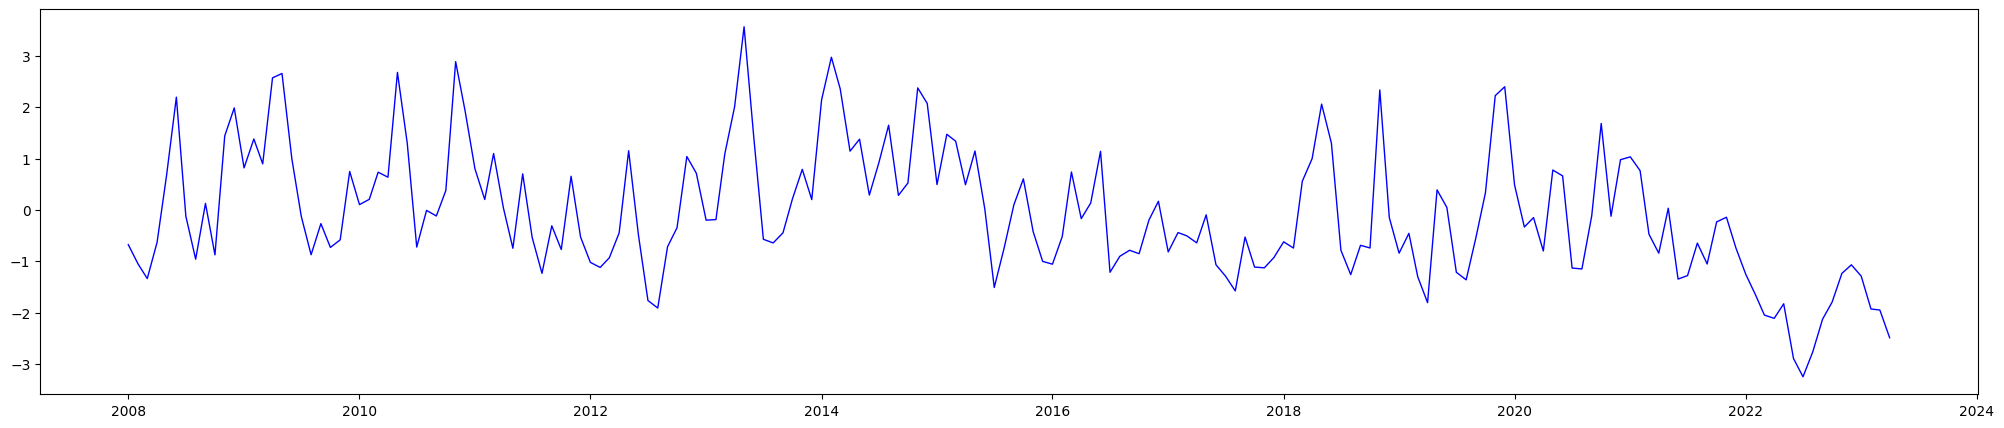

In [7]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)

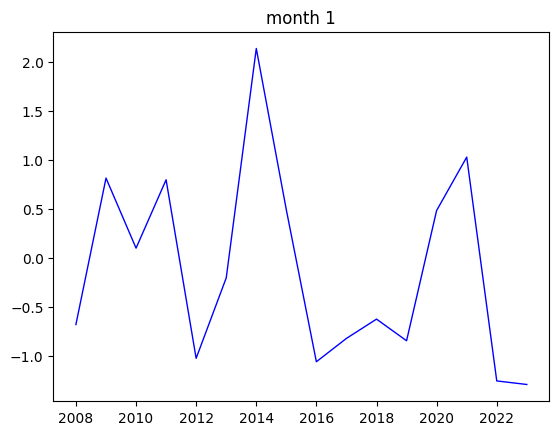

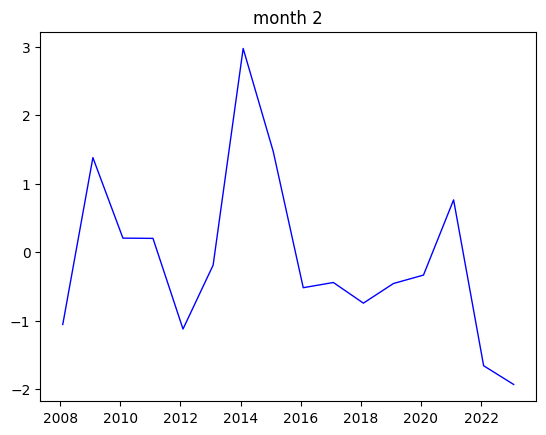

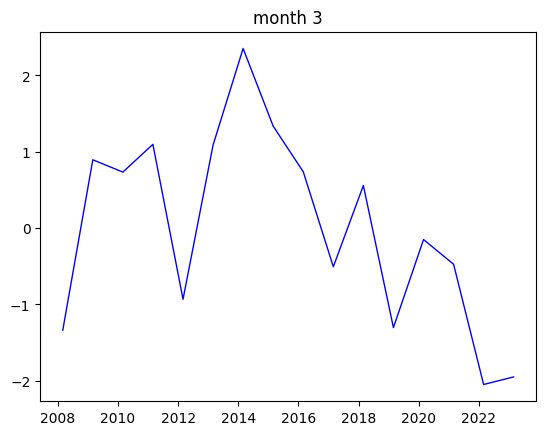

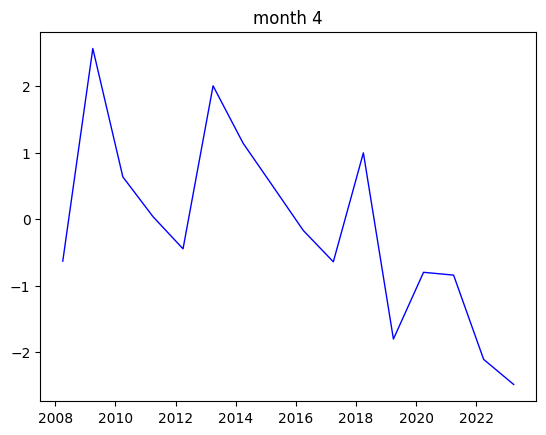

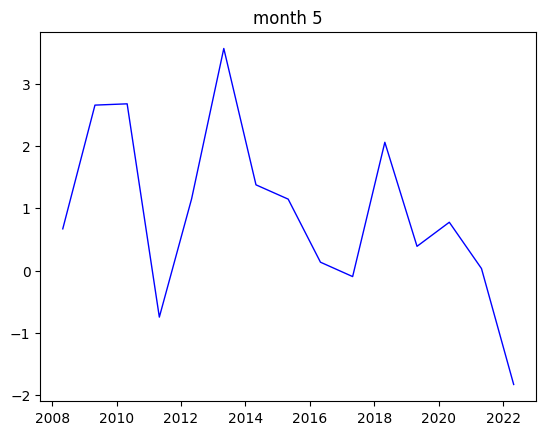

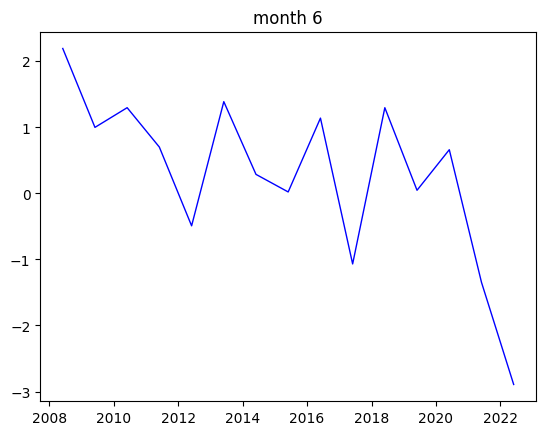

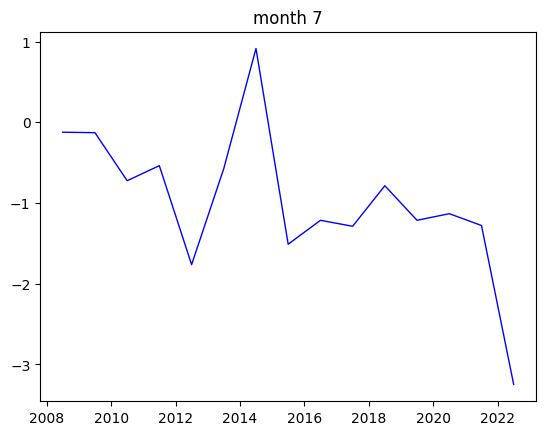

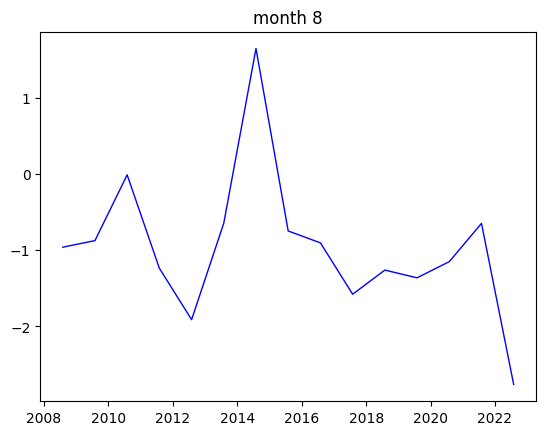

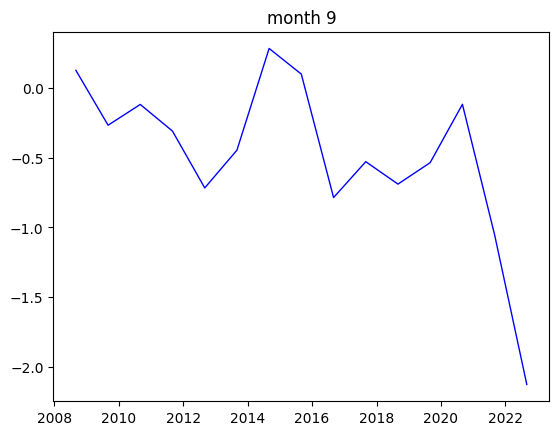

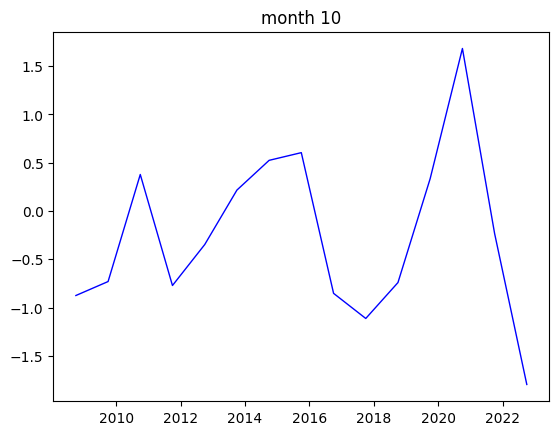

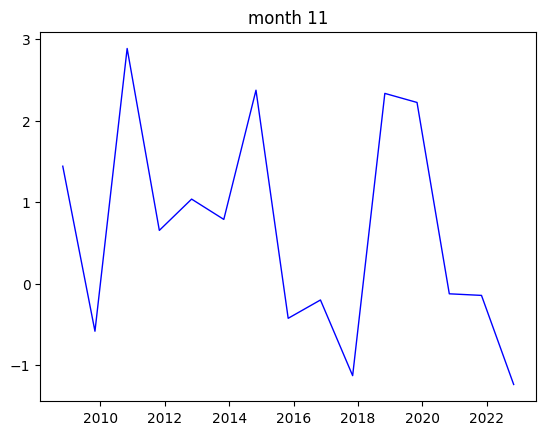

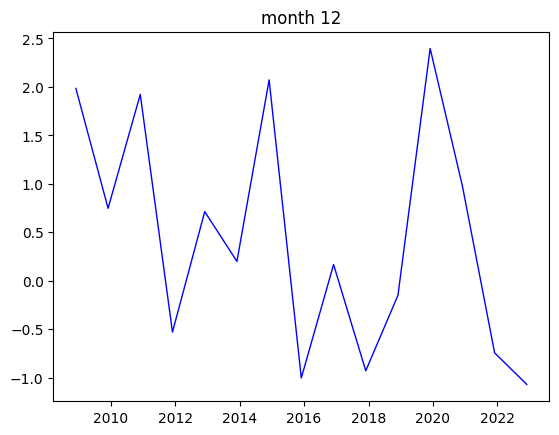

In [8]:
for i in range(1,13):
    indexes=np.where(np.int32(df['Month'])==i)[0]
    plt.plot(df['Date'][indexes],df['Average'][indexes],color='blue', linewidth=1)
    plt.title('month ' + str(i))
    plt.show()

In [9]:
import datetime
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#plt.ylabel('Po level')
#plt.xlabel('Date')
#plt.xticks(rotation=45)
#plt.plot(df.index, df['Average'], )

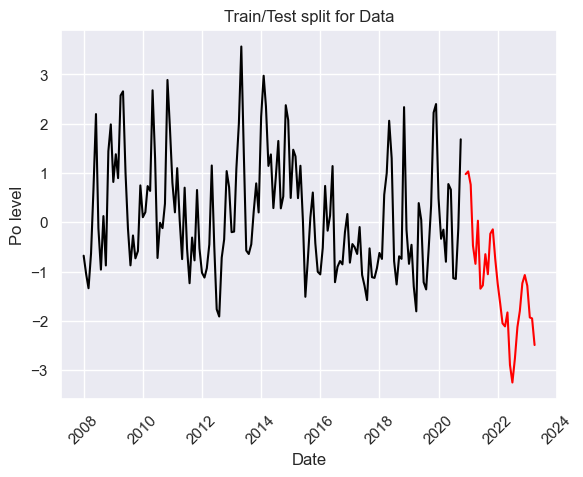

In [10]:
train = df[df.index < pd.to_datetime('2020-11-01', format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime('2020-11-01', format='%Y-%m-%d')]

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.ylabel('Po level')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

The series is NOT stationary
The series is stationary


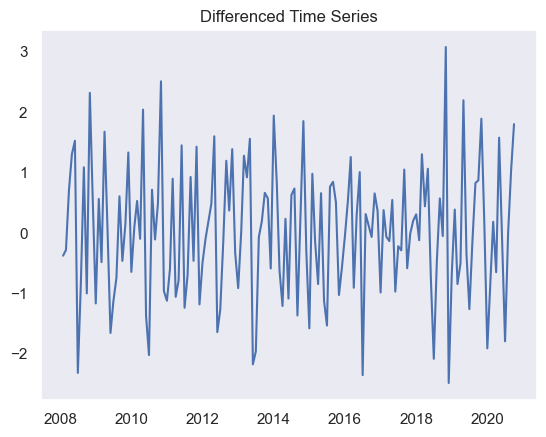

C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


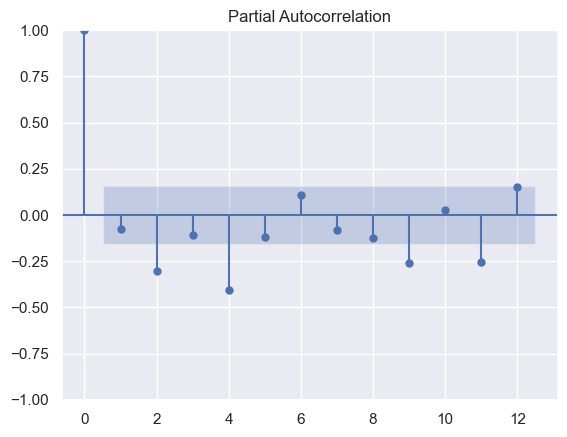

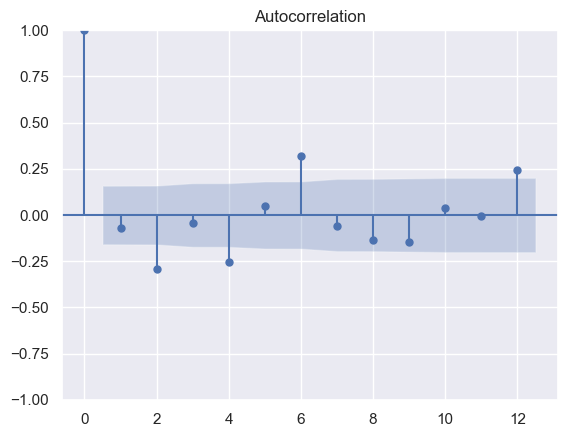

In [12]:
check_stationarity(train.Average)

ts_diff = train.Average.diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)
d=1

plt.plot(ts_diff)
plt.title('Differenced Time Series')
plt.grid()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ts_diff, lags =12)
plt.show()
p=11

plot_acf(ts_diff, lags =12)
plt.show()
q=6

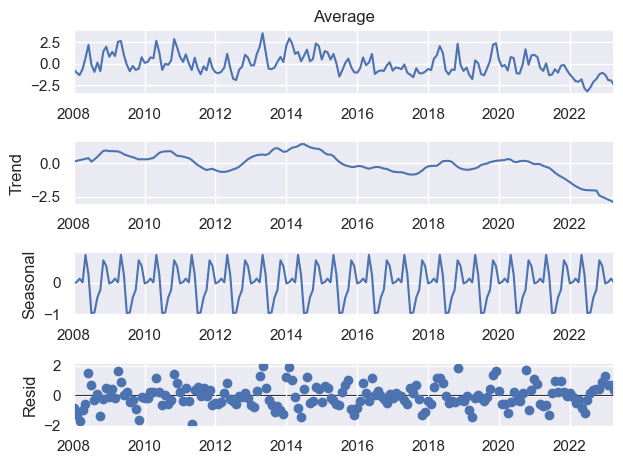

The series is stationary


C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


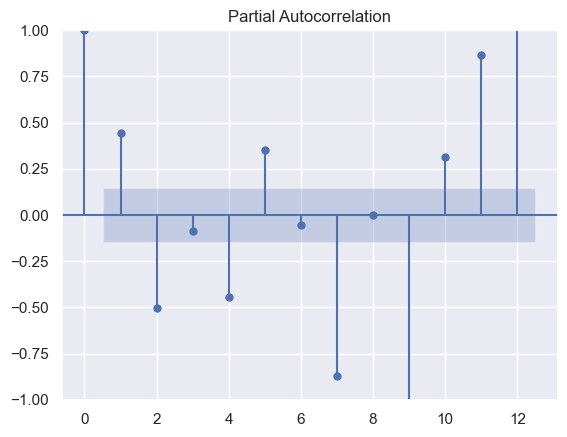

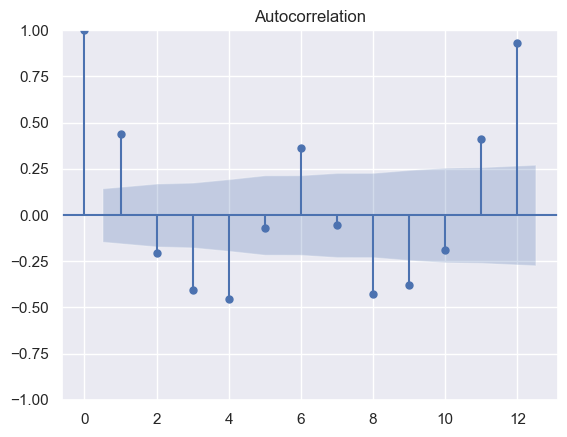

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.Average, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

seasonal = result.seasonal
check_stationarity(seasonal)
D=0

plot_pacf(seasonal, lags =12)
plt.show()
P=12

plot_acf(seasonal, lags =12)
plt.show()
Q=12
M=12

In [24]:
import pmdarima as pm
stepwise_model = pm.auto_arima(pd.concat( [train, test] ).Average,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train.Average)

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [17]:
p=1
d=1
q=1

P=1
D=0
Q=2
M=12

In [25]:
import statsmodels
SARIMAXmodel = statsmodels.tsa.statespace.sarimax.SARIMAX(y, order = (p, d, q), seasonal_order=(P,D,Q,M))
SARIMAXmodel = SARIMAXmodel.fit()

new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

NameError: name 'y' is not defined

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (p, d, q), seasonal_order=(P,D,Q,M))
SARIMAXmodel = SARIMAXmodel.fit()

new_date = pd.read_excel('Dati_po/Date.xlsx')
new_date = new_date.Date

y_pred = SARIMAXmodel.get_forecast(len(test.index)+452)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = np.concatenate((test.index, pd.to_datetime(new_date, format='%Y-%m-%d')), axis=None) 
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()